#Link to code:
https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data

In [11]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
    print("success")
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")


success


In [13]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

keywords = 'bird photos'

def search_images(keywords, max_images=200): 
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [15]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

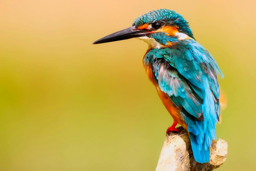

In [47]:
from fastdownload import download_url
path = '/Users/princemarcelle/Library/CloudStorage/OneDrive-Personal/Jupyter Notebook/Public Folders/Personal Projects/RecognizeBird/'
file_name = 'bird.jpg'
download_url(urls[0], path + file_name, show_progress=False)

from fastai.vision.all import *
im = Image.open(path + file_name)
im.to_thumb(256,256)


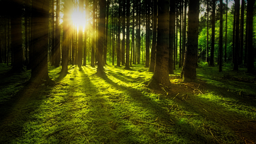

In [59]:
download_url(search_images('forest photos', max_images=1)[0], path + 'forest.jpg', show_progress=False)
Image.open(path + 'forest.jpg').to_thumb(256,256)


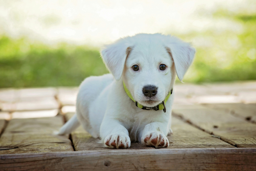

In [60]:
download_url(search_images('dog photos', max_images=1)[0], path + 'dog.jpg', show_progress=False)
Image.open(path + 'dog.jpg').to_thumb(256,256)

In [ ]:
#Download 400 images of forest and bird
searches = 'forest','bird'
path = Path('bird_or_not')
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)


In [25]:
#Removes any broken images
path = Path('bird_or_not')
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


0

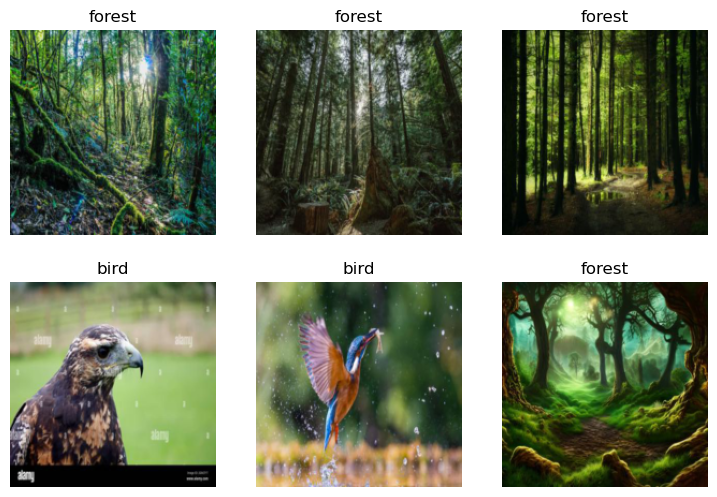

In [37]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)


In [39]:
#Train the model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.479065,0.087478,0.041667,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.131415,0.096543,0.033333,00:01
1,0.089318,0.032942,0.016667,00:01
2,0.056552,0.064740,0.016667,00:01
3,0.040418,0.127973,0.025000,00:01
4,0.030395,0.122847,0.033333,00:01
5,0.022489,0.140632,0.025000,00:01
6,0.017111,0.139139,0.025000,00:01
7,0.013772,0.116906,0.025000,00:01
8,0.010421,0.101502,0.025000,00:01
9,0.008541,0.096229,0.025000,00:01


In [57]:
is_bird,_,probs = learn.predict(PILImage.create('dog.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.8233
